# Kernel methods for biological sequence classification

MVA 2019 - Kernel methods for machine learning

*Éloïse Berthier, Guillaume Dalle, Clément Mantoux*

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

In [3]:
import backend
from kernels import *

Academic license - for non-commercial use only


Kernel computed on the fly on imported data

In [4]:
kernels1a = LinearKernel().load("mat100", indices=[0, 1, 2])
kernels1b = GaussianKernel(0.1).load("mat100", indices=[0, 1, 2])

Linear kernel computed on the fly on imported features

In [5]:
kernels2a = FeatureCSVKernel("SpectralKernel6", {}).load("spectr6", indices=[0, 1, 2])
kernels2b = FeatureCSVKernel("SpectralKernel4", {}).load("spectr4", indices=[0, 1, 2])
kernels2c = FeatureCSVKernel("TranslatedKernel", {}).load("trans6", indices=[0, 1, 2])
kernels2d = FeatureCSVKernel("TfIdfKernel6", {}).load("tfidf6", indices=[0, 1, 2])

Precomputed kernel defined from stored Gram matrices

In [6]:
kernels3 = GramCSVKernel("SubstringKernel", {}).load("substring4_0.7", indices=[0, 1])

Gaussian spectrum kernel

In [7]:
kernels4 = CauchyKernel(0.05).load("spectr5", indices=[0])+CauchyKernel(0.1).load("spectr5", indices=[1])+CauchyKernel(0.5).load("spectr5", indices=[0])

Boosting for Spectrum6 (better than Spectrum 4 and 5)

In [8]:
kernelsBoost = BoostingKernel(LinearKernel(), iterations=20).load("spectr6", [0,1,2])

100%|██████████| 20/20 [00:07<00:00,  2.67it/s]


Parameter tuning

In [9]:
lambdas = np.logspace(-3, 3, 5)

Tuning lambda on dataset 0 with kernel LinearKernel and params {'center': True, 'suffix': 'mat100'}: 100%|██████████| 5/5 [00:09<00:00,  1.82s/it]


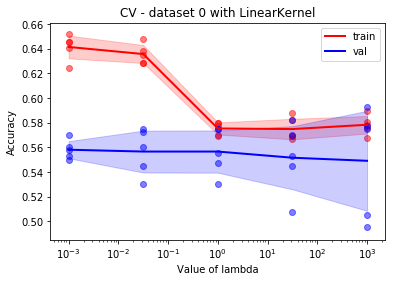

Tuning lambda on dataset 1 with kernel LinearKernel and params {'center': True, 'suffix': 'mat100'}: 100%|██████████| 5/5 [00:08<00:00,  1.71s/it]


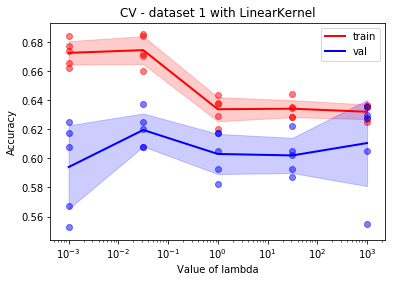

Tuning lambda on dataset 2 with kernel LinearKernel and params {'center': True, 'suffix': 'mat100'}: 100%|██████████| 5/5 [00:08<00:00,  1.72s/it]


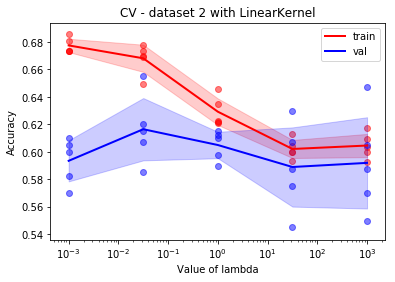

In [10]:
three_kernels = []
three_lambdas = []

use_multiple_kernel = False

for d in [0, 1, 2]:
    
    kernels_to_combine_or_compare = [
        kernels1a[d],
#         kernels1b[d],
#         kernels2a[d],
#         kernels2b[d],
#         kernels2c[d],
#         kernels2d[d],
#         kernels4[d]
#         kernelsBoost[d]
    ]
#     if d != 2:
#         kernels_to_combine_or_compare.append(kernels3[0])

    if use_multiple_kernel:
        best_kernel = MultipleKernel(
            kernels_to_combine_or_compare,
            grad_step=1, iterations=3,
            entropic=1
        )
        best_lambd = backend.tune_parameters(
            [best_kernel], lambdas,
            plot=True, result="best_lambdas")[0]
        
    else:
        best_kernel, best_lambd = backend.tune_parameters(
            kernels_to_combine_or_compare, lambdas,
            plot=True, result="best_kernel_lambda")
        
    three_kernels.append(best_kernel)
    three_lambdas.append(best_lambd)

In [11]:
backend.final_prediction(three_kernels, three_lambdas)

DATASET 0
DATASET 1
DATASET 2


Fast test for boosting kernels :

In [12]:
kernels = BoostingKernel(LinearKernel(), iterations=20).load("spectr6", [0,1,2])

100%|██████████| 20/20 [00:07<00:00,  2.62it/s]


In [13]:
for d in [0,1,2]:
    print("Dataset "+str(d))
    print(backend.cross_validate(kernels[d], 0.01)[1].mean())

Dataset 0
0.7465
Dataset 1
0.795
Dataset 2
0.7205
